In [1]:
import os
wd = os.getcwd()
wd = os.path.dirname(os.path.dirname(wd))
import sys
sys.path.append(wd+"\\src\\")

In [2]:
from tube import InterpXY
from math import *
import numpy as np
from termodyn import DirectBallMany, get_optsmany_sample, get_dpsi_array
from powderlayer import PowderBD
import pprint as pp

In [3]:
from tqdm import tqdm_notebook
from matplotlib.patches import Polygon
import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

mpl.rcParams['figure.figsize'] = (5,3) 

In [4]:
import json
from functional import seq

In [5]:
pdb = PowderBD()
pdb.all_powders_dict.keys()

dict_keys(['СФ 033', 'ВУ фл', 'ВТ', 'ВТМ', 'ВТХ-10', 'ВТХ-20', 'ВТД-25', '4\\1', '4\\1 фл', '4\\7', '4\\7 св', '4\\7 фл ВБП', '4\\7 ПТ-3 фл', '4\\7 Ц гр', '5\\1', '5\\1 х-10', '5\\1 х-20', '5\\1 д-20', '5\\1 д-25', '5\\7 св', '5\\7 н\\а', '5\\7 в\\а', '5\\7 Ц фл', '6\\7 гр', '6\\7 БП гр', '6\\7 фл В БП', '6\\7 П-5 БП фл', '6\\7 фл ', '7\\1', '7\\1 фл БП', '7\\7', '7\\14', '7\\1 УГ', '8\\1 тр', '8\\7', '8\\1 УГ', '9\\7', '9\\7 МН', '9\\7 БП', '11\\1 БП', '11\\7', '11\\1 УГ', '12\\1 Тр', '12\\1 тр БП', '12\\1 тр МН', '12\\7', '12\\7 В\\А', '12\\1 УГ', '14\\1 тр В\\А', '14\\7', '14\\7 В\\А', '14\\7 БП', '15\\1 тр В\\А', '15\\7', '16\\1 тр', '16\\1 тр В\\А', '17\\7', '18\\1 тр', '18\\1 тр БП', '22\\1 тр', '22\\7', '23\\7', '28\\1 тр', '37\\1 тр', 'НДТ-3 16\\1', 'НДТ-3 18\\1', 'НДТ-3 19\\1', 'НДТ-3 23\\1', 'НДТ-3 32\\1', 'НДТ-3 152\\57', 'ДГ-2 15\\1', 'ДГ-2 17\\1', 'ДГ-3 13\\1', 'ДГ-3 14\\1', 'ДГ-3 17\\1', 'ДГ-3 18\\1', 'ДГ-3 20\\1', 'ДГ-3 23\\1', 'ДГ-4 13\\1', '100\\56', '100\\70', '130\\5

### Нормальные пороха

In [6]:
good_powders = [
    'СФ 033', 'ВУ фл', 'ВТ', 'ВТМ', 'ВТХ-10', 'ВТХ-20', 'ВТД-25', '4\\1', '4\\1 фл', '4\\7', '4\\7 св', '4\\7 фл ВБП', 
    '4\\7 ПТ-3 фл', '4\\7 Ц гр', '5\\1', '5\\1 х-10', '5\\1 х-20', '5\\1 д-20', '5\\1 д-25', '5\\7 св', '5\\7 н\\а', 
    '5\\7 в\\а', '5\\7 Ц фл', '6\\7 гр', '6\\7 БП гр', '6\\7 фл В БП', '6\\7 П-5 БП фл', '6\\7 фл ', '7\\1', '7\\1 фл БП', 
    '7\\7', '7\\14', '7\\1 УГ', '8\\1 тр', '8\\7', '8\\1 УГ', '9\\7', '9\\7 МН', '9\\7 БП', '11\\1 БП', '11\\7', 
    '11\\1 УГ', '12\\1 Тр', '12\\1 тр БП', '12\\1 тр МН', '12\\7', '12\\7 В\\А', '12\\1 УГ', '14\\1 тр В\\А', '14\\7', 
    '14\\7 В\\А', '14\\7 БП', '15\\1 тр В\\А', '15\\7', '16\\1 тр', '16\\1 тр В\\А', '17\\7', '18\\1 тр', '18\\1 тр БП', 
    '22\\1 тр', '22\\7', '23\\7', '28\\1 тр', '37\\1 тр', 'НДТ-3 16\\1', 'НДТ-3 18\\1', 'НДТ-3 19\\1', 'НДТ-3 23\\1', 
    'НДТ-3 32\\1', 'НДТ-3 152\\57', 'ДГ-2 15\\1', 'ДГ-2 17\\1', 'ДГ-3 13\\1', 'ДГ-3 14\\1', 'ДГ-3 17\\1', 'ДГ-3 18\\1', 
    'ДГ-3 20\\1', 'ДГ-3 23\\1', 'ДГ-4 13\\1', '100\\56', '100\\70', '130\\50', '130\\58 БП', '152\\57', '152\\57 Ш', 
    '152\\57 БП', '180\\57', '180\\57 БП', '180\\57 Ш3 БП', '180\\60', 'НДТ-2 16\\1', 'НДТ-2 19\\1', 'НДТ-2 25\\1', 
    'НДТ-2 130\\50', 'НДТ-2 152\\57', 'ДГ-4 14\\1', 'ДГ-4 15\\1', ' АПЦ-235 П 16\\1', 
    'БНГ-1355 25\\1', 'МАП-1 23\\1', 'УГ-1', 'УГ-2', 'УГФ-1', 'ДРП', 'КЗДП']

In [7]:
# opts=get_optsmany_sample()
# opts

In [12]:
opts=get_optsmany_sample()
opts['init_cond']['p_f'] = 9e15
opts['powders'][0]['omega'] = 10
opts['powders'][1]['omega'] = 10
ball=DirectBallMany(opts)
ball.stop_foo = lambda t,y: t>0.01
res=ball.run()

In [13]:
# %timeit ball.run()

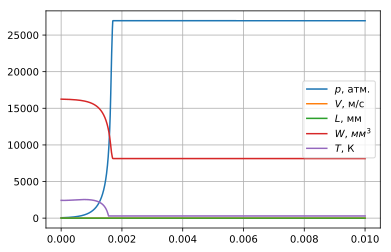

In [14]:
plt.plot(res[:,0], res[:,1]/1e5, label='$p$, атм.')
plt.plot(res[:,0], res[:,4], label='$V$, м/с')
plt.plot(res[:,0], res[:,2]*1000, label='$L$, мм')
plt.plot(res[:,0], res[:,3]*1e9, label='$W$, $мм^3$')
plt.plot(res[:,0], [ball.set_k_and_stuff(r[1:])[1] for r in res], label='$T$, К')
plt.legend()
plt.grid(True)
plt.show()

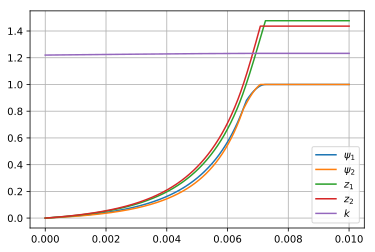

In [47]:
plt.plot(res[:,0], res[:,5], label='$\psi_1$')
plt.plot(res[:,0], res[:,7], label='$\psi_2$')
plt.plot(res[:,0], res[:,6], label='$z_1$')
plt.plot(res[:,0], res[:,8], label='$z_2$')
plt.plot(res[:,0], [ball.set_k_and_stuff(r[1:])[0] for r in res], label='$k$')
plt.legend()
plt.grid(True)
plt.show()

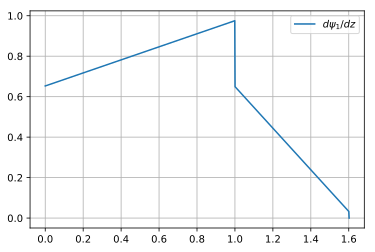

In [18]:
plt.plot(ball.opts['powders'][1]['zs'], ball.opts['powders'][1]['dpsi_dz'], label='$d\psi_1/dz$')

plt.legend()
plt.grid(True)
plt.show()

In [19]:
ixy = InterpXY(ball.opts['powders'][1]['zs'], ball.opts['powders'][1]['dpsi_dz'])
ixy.integrate()

1.0191858745915987

In [15]:
ball.omega_vospl*1000

0.27644230769230765

In [17]:
[(ball.set_k_and_stuff(r), r) for r in res]

[((1.22, 2427.0, 107.12814173877216),
  array([0.0000e+00, 5.0000e+06, 0.0000e+00, 1.4375e-05, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])),
 ((1.2200683442919502, 2428.055919310631, 108.10613138659203),
  array([6.00000000e-06, 5.11136467e+06, 0.00000000e+00, 1.43743346e-05,
         0.00000000e+00, 7.68754322e-05, 9.47901873e-05, 6.60261741e-05,
         1.01109533e-04])),
 ((1.2201377303854548, 2429.1279344552763, 109.09815916714241),
  array([1.20000000e-05, 5.22531648e+06, 0.00000000e+00, 1.43736544e-05,
         0.00000000e+00, 1.55465131e-04, 1.91692623e-04, 1.33527045e-04,
         2.04472131e-04])),
 ((1.2202081664683697, 2430.2161719363125, 110.1043036988196),
  array([1.80000000e-05, 5.34191597e+06, 0.00000000e+00, 1.43729590e-05,
         0.00000000e+00, 2.35808978e-04, 2.90756381e-04, 2.02537025e-04,
         3.10140140e-04])),
 ((1.2202796604468145, 2431.3207539032837, 111.12463866822034),
  array([2.40000000e-05, 5.46122512e+06, 0.00000000e+00, 